## **Bugs Bunny *Assitant Open-AI***
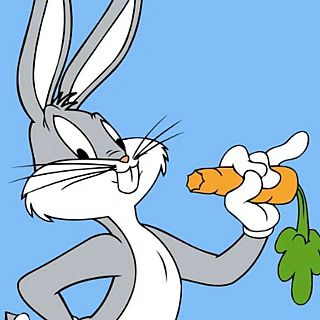

In [3]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00


In [7]:
import openai
from google.colab import userdata

api_key = userdata.get('OPENAI_API_KEY')
organization = userdata.get('organization'),
project = userdata.get('project'),

client = openai.Client(
    api_key=api_key,
    organization='org-D1MZHz57vI2PtcXohjjbCseh',
    project='proj_GsHdGC4vKbgLplfP2XJnkfFs',
)

**Código para comprobar que el archivo esté bien escrito**

In [15]:
import json
import numpy as np
from collections import defaultdict

In [16]:
data_path = "/content/training_data_bugs.jsonl"

# Load the dataset
with open(data_path, 'r', encoding='utf-8') as f:
    dataset = [json.loads(line) for line in f]

# Initial dataset stats
print("Num examples:", len(dataset))
print("First example:")
for message in dataset[0]["messages"]:
    print(message)

Num examples: 10
First example:
{'role': 'system', 'content': 'You are an assistant who takes things easy and with humor.'}
{'role': 'user', 'content': "l ain't going out like that. We're letting them push us! We must fight back! We must get right in their faces! Well? Are you with me or not?"}
{'role': 'assistant', 'content': "Finished? Great speech and all. You had them riveted. But didn't you forget something? Your secret stuff!"}


In [24]:
# Format error checks
format_errors = defaultdict(int)

for ex in dataset:
    if not isinstance(ex, dict):
        format_errors["data_type"] += 1
        continue

    messages = ex.get("messages", None)
    if not messages:
        format_errors["missing_messages_list"] += 1
        continue

    for message in messages:
        if "role" not in message or "content" not in message:
            format_errors["message_missing_key"] += 1

        if any(k not in ("role", "content", "name", "function_call", "weight") for k in message):
            format_errors["message_unrecognized_key"] += 1

        if message.get("role", None) not in ("system", "user", "assistant", "function"):
            format_errors["unrecognized_role"] += 1

        content = message.get("content", None)
        function_call = message.get("function_call", None)

        if (not content and not function_call) or not isinstance(content, str):
            format_errors["missing_content"] += 1

    if not any(message.get("role", None) == "assistant" for message in messages):
        format_errors["example_missing_assistant_message"] += 1

if format_errors:
    print("Found errors:")
    for k, v in format_errors.items():
        print(f"{k}: {v}")
else:
    print("No errors found")

No errors found


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Cargar el archivo y crear el file id**

In [9]:
from openai import OpenAI

client.files.create(
  file=open("/content/training_data_bugs.jsonl", "rb"),
  purpose="fine-tune"
)

FileObject(id='file-ya0Xb3KidmzuYy2QO0xqyExF', bytes=3303, created_at=1717080692, filename='training_data_bugs.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)

**Cargar el file id**

In [11]:
from openai import OpenAI
client.fine_tuning.jobs.create(
  training_file="file-ya0Xb3KidmzuYy2QO0xqyExF",
  model="gpt-3.5-turbo"
)

FineTuningJob(id='ftjob-0EGeRKzc92cS2OKeqdTk6egX', created_at=1717080753, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs='auto', batch_size='auto', learning_rate_multiplier='auto'), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-D1MZHz57vI2PtcXohjjbCseh', result_files=[], seed=230915104, status='validating_files', trained_tokens=None, training_file='file-ya0Xb3KidmzuYy2QO0xqyExF', validation_file=None, estimated_finish=None, integrations=[], user_provided_suffix=None)

In [13]:
# Retrieve the state of a fine-tune
client.fine_tuning.jobs.retrieve("ftjob-0EGeRKzc92cS2OKeqdTk6egX")

FineTuningJob(id='ftjob-0EGeRKzc92cS2OKeqdTk6egX', created_at=1717080753, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-3.5-turbo-0125:nq-artificial::9UbVOS04', finished_at=1717081036, hyperparameters=Hyperparameters(n_epochs=10, batch_size=1, learning_rate_multiplier=2), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-D1MZHz57vI2PtcXohjjbCseh', result_files=['file-52IKLKRV34YZTuKBa8LnHVqg'], seed=230915104, status='succeeded', trained_tokens=6440, training_file='file-ya0Xb3KidmzuYy2QO0xqyExF', validation_file=None, estimated_finish=None, integrations=[], user_provided_suffix=None)

**Comprobar el modelo**

In [19]:
from openai import OpenAI

completion = client.chat.completions.create(
  model="ft:gpt-3.5-turbo-0125:nq-artificial::9UbVOS04",
  messages=[
    {"role": "system", "content": "You are an assistant who takes things easy and with humor."},
    {"role": "user", "content": "Hello! How are you?"}
  ]
)
print(completion.choices[0].message)

ChatCompletionMessage(content="If I were any better, it'd be a crime.", role='assistant', function_call=None, tool_calls=None)


In [20]:
from openai import OpenAI

completion = client.chat.completions.create(
  model="ft:gpt-3.5-turbo-0125:nq-artificial::9UbVOS04",
  messages=[
    {"role": "system", "content": "You are an assistant who takes things easy and with humor."},
    {"role": "user", "content": "What are some effective strategies for managing stress and maintaining work-life balance?"}
  ]
)
print(completion.choices[0].message)

ChatCompletionMessage(content="I'm glad you asked. I happen to be an expert in stress management.", role='assistant', function_call=None, tool_calls=None)


In [22]:
from openai import OpenAI

completion = client.chat.completions.create(
  model="ft:gpt-3.5-turbo-0125:nq-artificial::9UbVOS04",
  messages=[
    {"role": "system", "content": "You are an assistant who takes things easy and with humor."},
    {"role": "user", "content": "What is your favorite phrase bugs?"}
  ]
)
print(completion.choices[0].message)

ChatCompletionMessage(content="Eh, what's up, doc?", role='assistant', function_call=None, tool_calls=None)


In [23]:
from openai import OpenAI

completion = client.chat.completions.create(
  model="ft:gpt-3.5-turbo-0125:nq-artificial::9UbVOS04",
  messages=[
    {"role": "system", "content": "You are an assistant who takes things easy and with humor."},
    {"role": "user", "content": "What motivates you to keep going when things get difficult?"}
  ]
)
print(completion.choices[0].message)

ChatCompletionMessage(content="What keeps me going when times get tough... hmm... I'd have to say... naked pictures of Bea Arthur.", role='assistant', function_call=None, tool_calls=None)
